In [133]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [134]:
#Import Dataset
data = load_breast_cancer()

In [ ]:
# Membuat DataFrame dari dataset breast cancer
# Menyusun data fitur (data.data) ke dalam DataFrame dengan nama kolom sesuai fitur asli (data.feature_names)
df = pd.DataFrame(data.data, columns=data.feature_names)

# Menambahkan kolom 'target' ke DataFrame untuk menyimpan label kelas (0 = malignant, 1 = benign)
df['target'] = data.target


In [ ]:
# Mengambil 5 data utama dari df
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Menampilkan jumlah baris dan kolom dalam DataFrame (baris = jumlah sampel, kolom = fitur + target)
df.shape


(569, 31)

In [ ]:
# Menampilkan tipe data dari setiap kolom dalam DataFrame (misalnya float64, int64, dll)
df.dtypes


mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

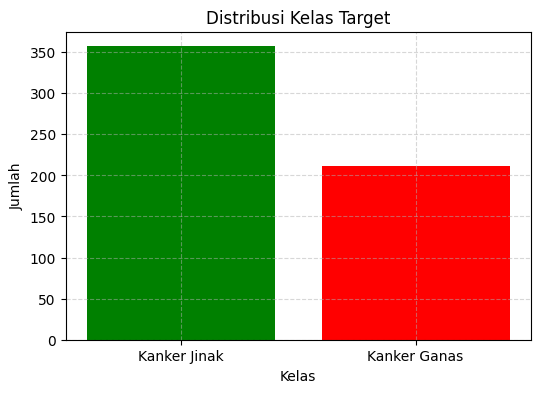

Persentase masing-masing kelas:
 target
1    62.741652
0    37.258348
Name: proportion, dtype: float64


In [ ]:
# Menghitung jumlah masing-masing kelas pada kolom 'target'
target_counts = df['target'].value_counts()

# Menyiapkan label dan warna untuk visualisasi (1 = Jinak, 0 = Ganas)
labels = ['Tumor Jinak', 'Tumor Ganas']
colors = ['green', 'red']

# Membuat plot batang (bar plot) distribusi kelas target
plt.figure(figsize=(6, 4))
plt.bar(labels, [target_counts[1], target_counts[0]], color=colors)
plt.title('Distribusi Kelas Target')  # Judul grafik
plt.xlabel('Kelas')                   # Label sumbu x
plt.ylabel('Jumlah')                  # Label sumbu y
plt.grid(True, linestyle='--', alpha=0.5)  # Menambahkan grid dengan garis putus-putus
plt.show()

# Menampilkan persentase dari masing-masing kelas
print("Persentase masing-masing kelas:\n", df['target'].value_counts(normalize=True) * 100)


In [ ]:
# Menghitung persentase distribusi dari masing-masing kelas pada kolom 'target'
# (normalize=True akan membagi setiap count dengan total sehingga hasilnya proporsi, lalu dikali 100 untuk persen)
df['target'].value_counts(normalize=True) * 100


target
1    62.741652
0    37.258348
Name: proportion, dtype: float64

In [ ]:
# Menampilkan ringkasan statistik deskriptif untuk setiap fitur numerik dalam DataFrame
# Termasuk nilai count, mean, std, min, quartiles (25%, 50%, 75%), dan max
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


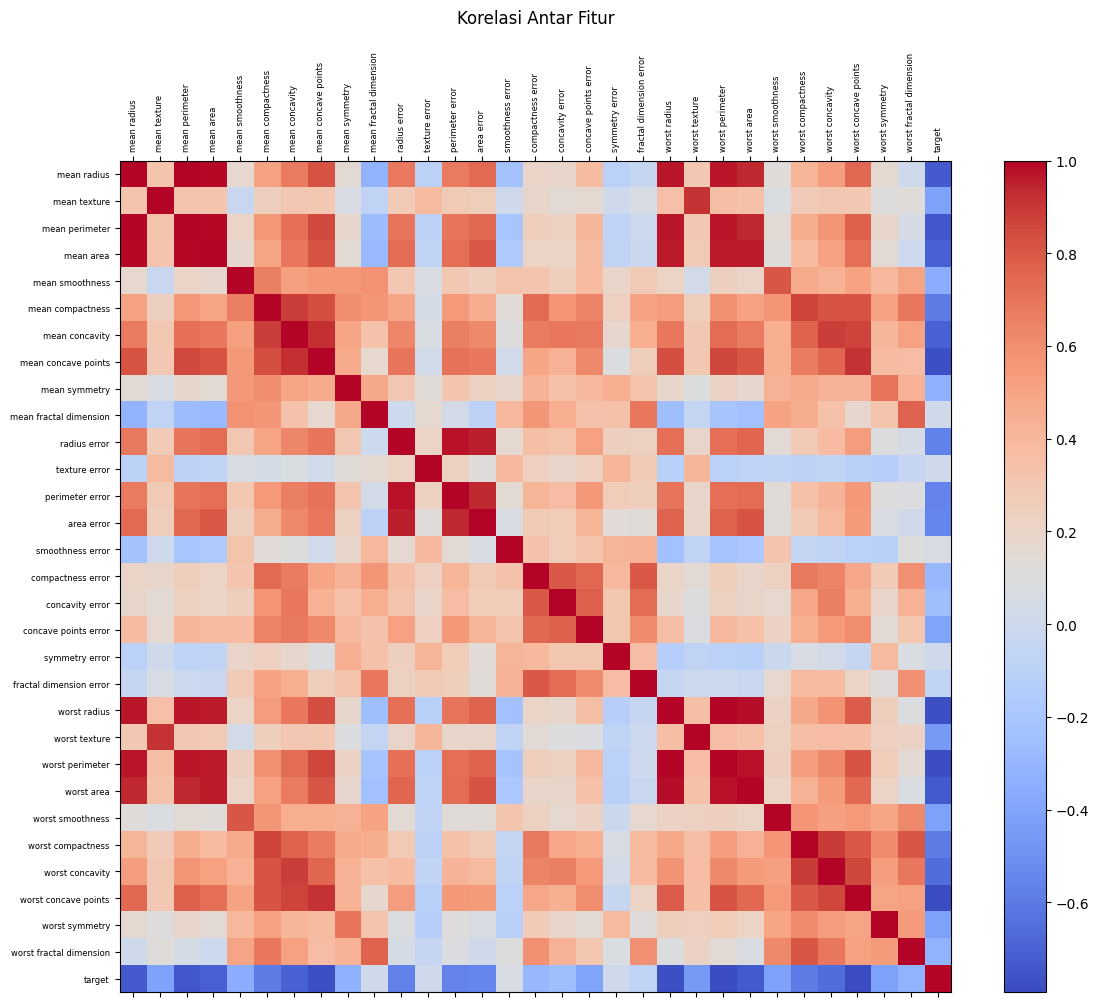

In [ ]:
# Menghitung matriks korelasi antara semua fitur dalam DataFrame
correlation = df.corr()

# Membuat figure dan axis untuk visualisasi heatmap korelasi
fig, ax = plt.subplots(figsize=(12, 10))

# Menampilkan heatmap dengan skala warna 'coolwarm' (biru ke merah)
cax = ax.matshow(correlation, cmap='coolwarm')

# Menambahkan colorbar di samping untuk menunjukkan skala korelasi
fig.colorbar(cax)

# Menampilkan nama-nama fitur di sumbu x dan y
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90, fontsize=6)
plt.yticks(range(len(correlation.columns)), correlation.columns, fontsize=6)

# Menambahkan judul plot
plt.title('Korelasi Antar Fitur', pad=20)

# Menyesuaikan layout agar label tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()


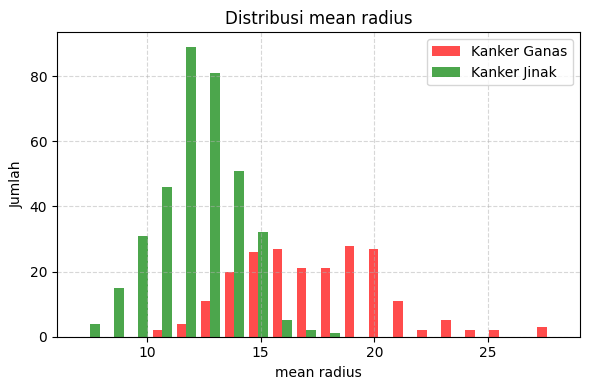

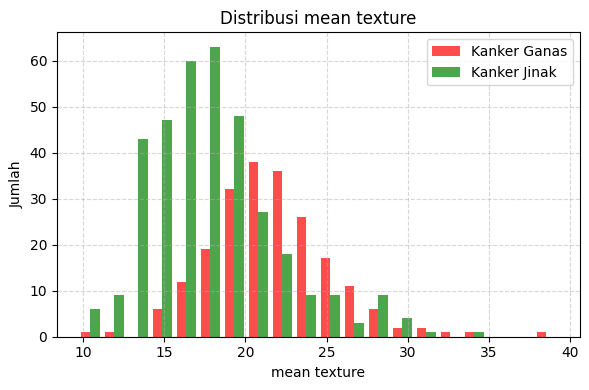

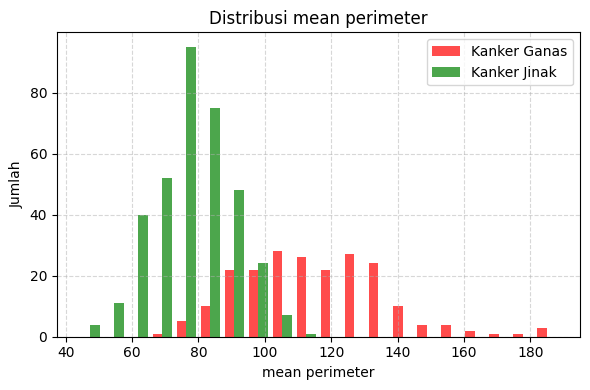

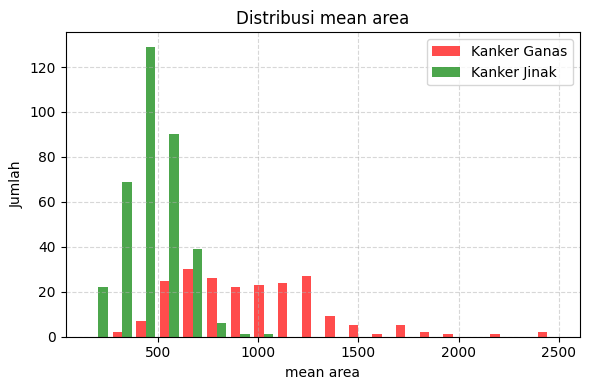

In [ ]:
# Menghitung matriks korelasi antara semua fitur dalam DataFrame
# .corr() menghasilkan matriks yang menunjukkan hubungan linier antara fitur-fitur numerik
correlation = df.corr()

# Membuat figure dan axis untuk visualisasi heatmap korelasi
# Ukuran figure disesuaikan agar cukup besar untuk menampilkan informasi dengan jelas
fig, ax = plt.subplots(figsize=(12, 10))

# Menampilkan heatmap dengan skala warna 'coolwarm' (biru untuk negatif, merah untuk positif)
# Ini menunjukkan tingkat korelasi antar fitur
cax = ax.matshow(correlation, cmap='coolwarm')

# Menambahkan colorbar di samping untuk menunjukkan skala korelasi
# Ini memberikan informasi tentang bagaimana warna pada heatmap berhubungan dengan nilai korelasi
fig.colorbar(cax)

# Menampilkan nama-nama fitur di sumbu x dan y
# .xticks dan .yticks digunakan untuk menampilkan nama fitur sesuai dengan kolom-kolom pada matriks korelasi
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90, fontsize=6)
plt.yticks(range(len(correlation.columns)), correlation.columns, fontsize=6)

# Menambahkan judul pada plot untuk memberi konteks pada heatmap
plt.title('Korelasi Antar Fitur', pad=20)

# Menyesuaikan layout agar label pada sumbu tidak terpotong, memastikan visualisasi lebih rapi
plt.tight_layout()

# Menampilkan plot heatmap
plt.show()


/tmp/ipykernel_30761/1827652471.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[feature] for feature in features_to_plot], labels=features_to_plot)


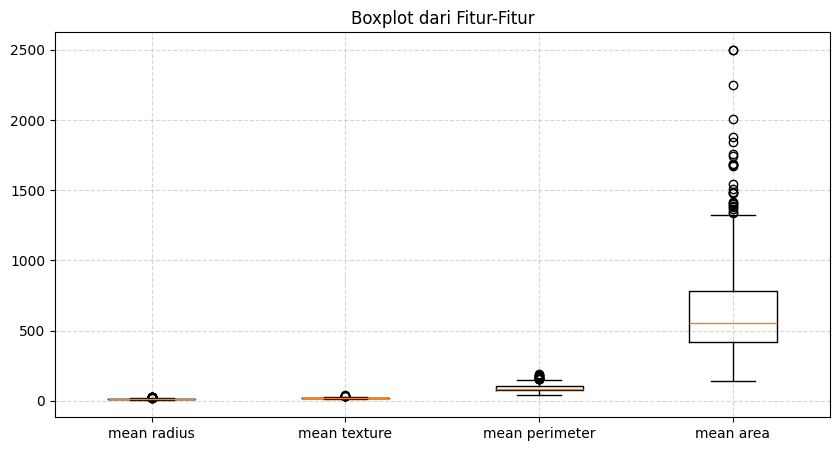

In [ ]:
# Membuat figure untuk boxplot dengan ukuran yang sesuai (10x5)
# Boxplot digunakan untuk melihat distribusi dari fitur-fitur yang dipilih
plt.figure(figsize=(10, 5))

# Membuat boxplot untuk fitur-fitur yang ada dalam 'features_to_plot'
# Setiap fitur akan diplot sebagai sebuah boxplot dengan label sesuai nama fitur
plt.boxplot([df[feature] for feature in features_to_plot], labels=features_to_plot)

# Menambahkan judul untuk boxplot
plt.title('Boxplot dari Fitur-Fitur')

# Menambahkan grid dengan garis putus-putus untuk memudahkan pembacaan data
plt.grid(True, linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()


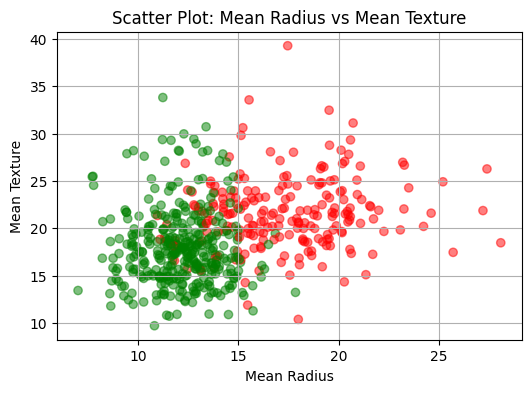

In [ ]:
# Membuat figure dengan ukuran 6x4 untuk visualisasi scatter plot
plt.figure(figsize=(6, 4))

# Menentukan warna berdasarkan kelas target
# 'red' untuk kelas 0 (malignant) dan 'green' untuk kelas 1 (benign)
colors = ['red' if t == 0 else 'green' for t in df['target']]

# Membuat scatter plot dengan sumbu x 'mean radius' dan sumbu y 'mean texture'
# Warna titik ditentukan oleh kelas target, dengan transparansi alpha 0.5
plt.scatter(df['mean radius'], df['mean texture'], c=colors, alpha=0.5)

# Menambahkan label pada sumbu x
plt.xlabel('Mean Radius')

# Menambahkan label pada sumbu y
plt.ylabel('Mean Texture')

# Menambahkan judul plot
plt.title('Scatter Plot: Mean Radius vs Mean Texture')

# Menambahkan grid untuk mempermudah pembacaan data
plt.grid(True)

# Menampilkan plot
plt.show()


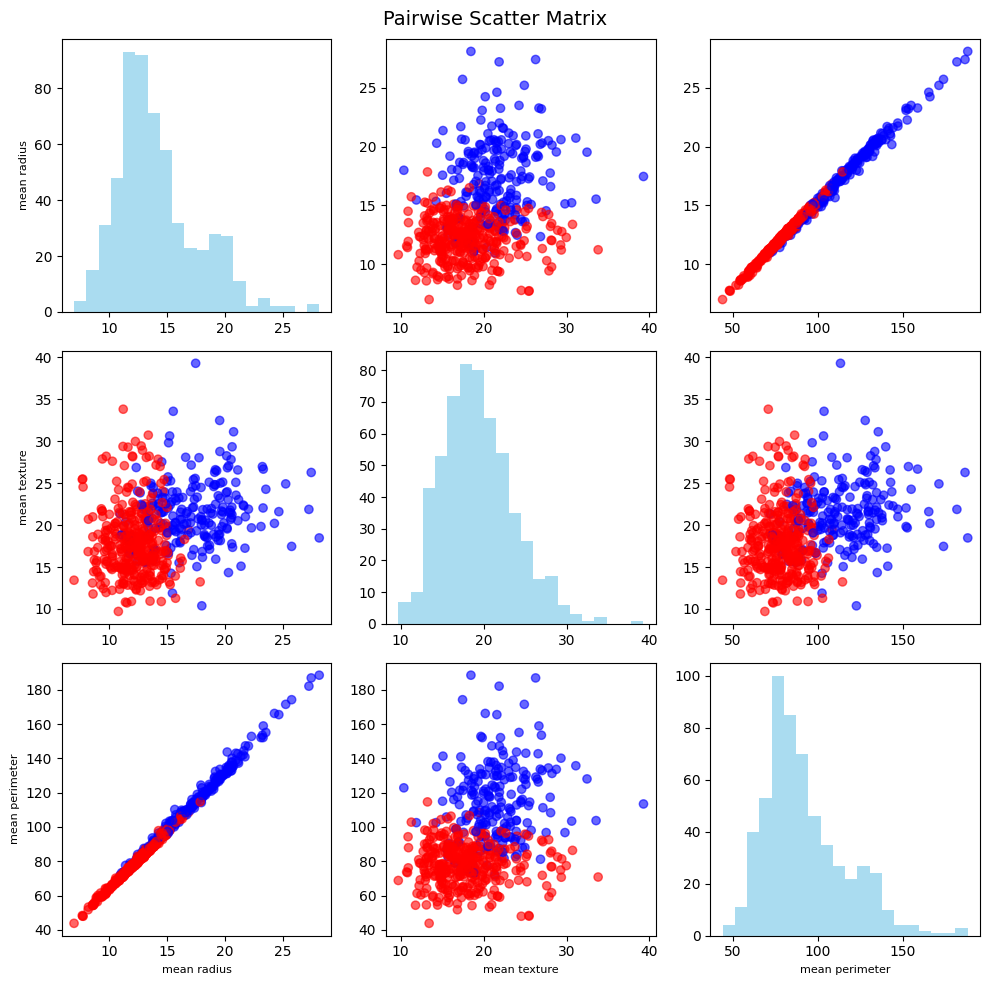

In [ ]:
# Mendefinisikan fitur yang akan digunakan dalam pairwise scatter matrix
features = ['mean radius', 'mean texture', 'mean perimeter']

# Membuat subplot yang terdiri dari len(features) x len(features) (matriks scatter plot)
# Set ukuran figure menjadi 10x10
fig, axes = plt.subplots(len(features), len(features), figsize=(10, 10))

# Melakukan iterasi untuk mengisi setiap plot dalam matriks
for i in range(len(features)):
    for j in range(len(features)):
        # Jika i == j, maka plot histogram untuk fitur tersebut
        if i == j:
            axes[i, j].hist(df[features[i]], bins=20, color='skyblue', alpha=0.7)
        # Jika i != j, maka plot scatter plot untuk pasangan fitur (j, i)
        else:
            axes[i, j].scatter(df[features[j]], df[features[i]], c=df['target'], cmap='bwr', alpha=0.6)
        
        # Menambahkan label sumbu x di baris terakhir
        if i == len(features)-1:
            axes[i, j].set_xlabel(features[j], fontsize=8)
        
        # Menambahkan label sumbu y di kolom pertama
        if j == 0:
            axes[i, j].set_ylabel(features[i], fontsize=8)

# Menambahkan judul utama untuk seluruh matriks scatter
plt.suptitle("Pairwise Scatter Matrix", fontsize=14)

# Menyesuaikan layout agar tidak ada elemen yang terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()


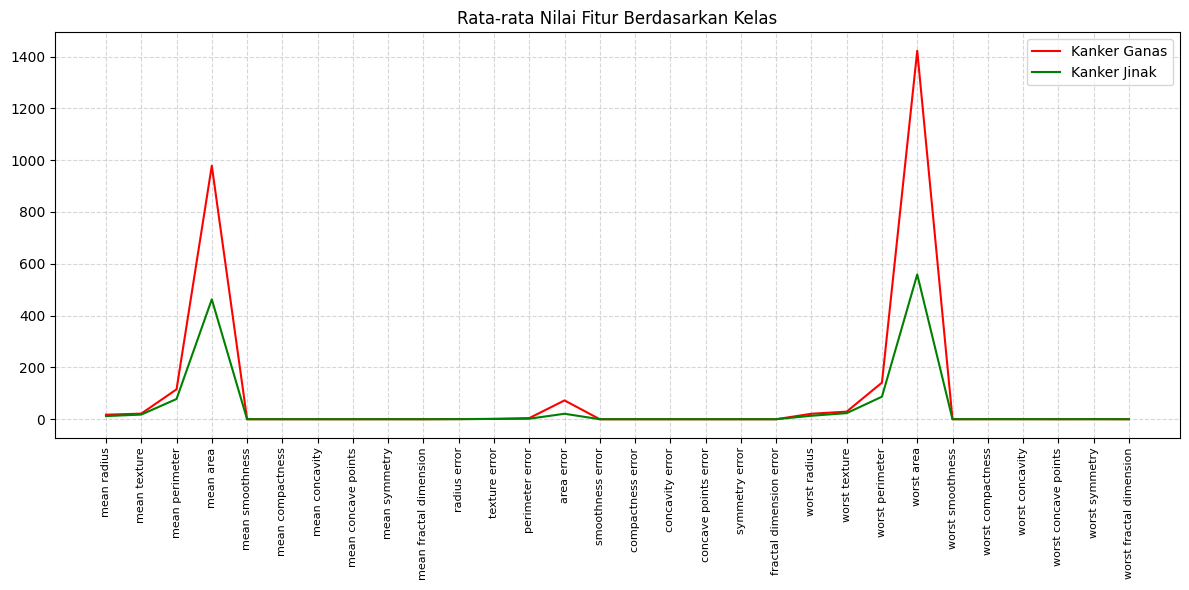

In [ ]:
# Menghitung rata-rata nilai fitur untuk setiap kelas target (0 = Tumor Ganas, 1 = Tumor Jinak)
# df.groupby('target').mean() mengelompokkan data berdasarkan kelas target dan menghitung rata-rata untuk setiap fitur
# .T digunakan untuk mentranspose hasilnya agar fitur berada di baris dan target di kolom
means = df.groupby('target').mean().T

# Membuat figure dengan ukuran 12x6 untuk visualisasi
plt.figure(figsize=(12,6))

# Plot rata-rata fitur untuk Tumor Ganas (kelas 0) dengan warna merah
plt.plot(means[0], label='Tumor Ganas', color='red')

# Plot rata-rata fitur untuk Tumor Jinak (kelas 1) dengan warna hijau
plt.plot(means[1], label='Tumor Jinak', color='green')

# Menambahkan rotasi 90 derajat pada label sumbu X agar lebih mudah dibaca
plt.xticks(rotation=90, fontsize=8)

# Menambahkan judul pada plot
plt.title('Rata-rata Nilai Fitur Berdasarkan Kelas')

# Menambahkan legend untuk membedakan antara Tumor Ganas dan Tumor Jinak
plt.legend()

# Menambahkan grid pada plot untuk meningkatkan keterbacaan
plt.grid(True, linestyle='--', alpha=0.5)

# Menyesuaikan layout agar tidak ada elemen yang terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()


In [ ]:
# Menghapus kolom 'target' dari DataFrame df untuk mendapatkan fitur-fitur sebagai input
# df.drop('target', axis=1) menghapus kolom 'target' (kelas) dan hanya menyisakan fitur-fitur
X = df.drop('target', axis=1).values

# Mengambil kolom 'target' sebagai label (output) dan merubah bentuknya menjadi vektor kolom
# reshape(-1, 1) digunakan untuk memastikan y menjadi vektor kolom, yang diperlukan oleh banyak algoritma pembelajaran mesin
y = df['target'].values.reshape(-1, 1)


In [ ]:
# Inisialisasi PCA dengan n_components=2 untuk mereduksi dimensi data menjadi 2 komponen utama
pca = PCA(n_components=2)

# Melakukan transformasi data X menjadi 2 komponen utama yang dapat digunakan untuk visualisasi
X_pca = pca.fit_transform(X)


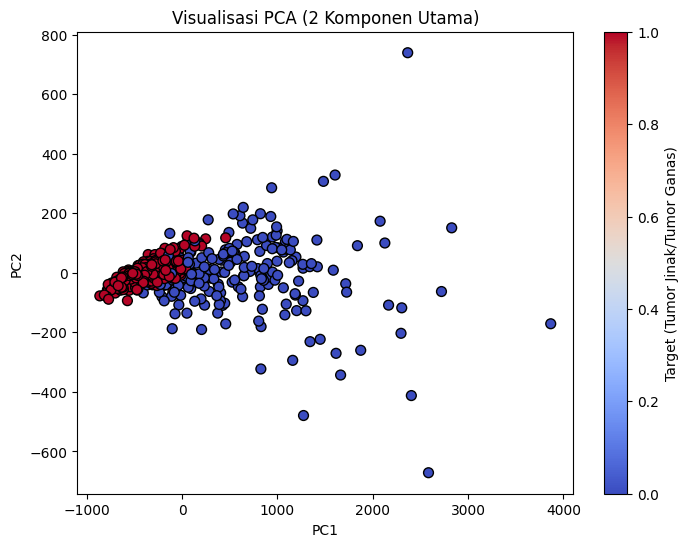

In [ ]:
plt.figure(figsize=(8, 6))
# Membuat scatter plot dengan dua komponen utama dari PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.flatten(), cmap='coolwarm', edgecolor='k', s=50)
# Menambahkan colorbar yang menggambarkan target (Tumor Jinak / Tumor Ganas)
plt.colorbar(label='Target (Tumor Jinak/Tumor Ganas)')
# Menambahkan judul plot
plt.title('Visualisasi PCA (2 Komponen Utama)')
# Menambahkan label untuk sumbu X dan Y
plt.xlabel('PC1')
plt.ylabel('PC2')
# Menampilkan plot
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)  # Membuat 2 cluster (Tumor Jinak dan Tumor Ganas)
kmeans.fit(X)  # Melatih model KMeans dengan data fitur X
y_kmeans = kmeans.predict(X)  # Memprediksi label cluster untuk data X

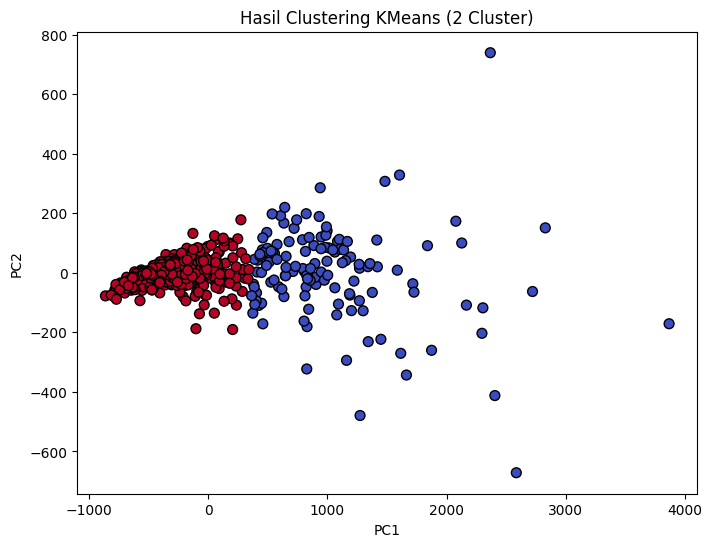

In [ ]:
# Membuat figure dengan ukuran 8x6 inci
plt.figure(figsize=(8, 6))

# Membuat scatter plot dengan komponen utama pertama (PC1) dan kedua (PC2) sebagai sumbu X dan Y
# Warna titik akan ditentukan berdasarkan hasil prediksi cluster dari KMeans (y_kmeans)
# cmap='coolwarm' akan memberikan skema warna yang jelas antara dua cluster (misalnya, merah dan biru)
# Setiap titik akan memiliki garis tepi hitam ('edgecolor='k'') dan ukuran titik diset menjadi 50
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='coolwarm', edgecolor='k', s=50)

# Memberikan judul pada plot yang menandakan bahwa ini adalah hasil clustering dengan KMeans
plt.title('Hasil Clustering KMeans (2 Cluster)')

# Menambahkan label pada sumbu X (PC1) dan sumbu Y (PC2) untuk memudahkan interpretasi
plt.xlabel('PC1')
plt.ylabel('PC2')

# Menampilkan plot
plt.show()


In [153]:
#Standarisasi Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [154]:
#Ubah Bentuk Data dengan encoding
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

In [155]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

#  **1. Perceptron**

In [156]:
#Membuat Fungsi Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [157]:
#Membuat Fungsi Sigmoid Derivative
def sigmoid_derivative(x):
    return x * (1 - x)

In [158]:
input_size = X_train.shape[1]  # Menentukan ukuran input berdasarkan jumlah fitur pada data latih
output_size = 2  # Menentukan ukuran output (jumlah kelas)
learning_rate = 0.03  # Menentukan nilai learning rate untuk pembelajaran
perceptron_acc = []  # Membuat list kosong untuk menyimpan akurasi model Perceptron
perceptron_epochs_logged = []  # Membuat list kosong untuk mencatat epoch yang dilog


In [159]:
# Tetapkan seed random untuk memastikan hasil yang dapat direproduksi
np.random.seed(1) 

# Inisialisasi bobot secara acak dengan nilai dalam rentang [-1, 1]
w = 2 * np.random.random((input_size, output_size))  
# Inisialisasi bias dengan nilai nol
b = np.zeros((1, output_size)) 

In [160]:
print(y_train.shape)

(455, 2)


In [161]:
prev_acc = 0
tolerance = 0.01  # toleransi perbedaan akurasi (misal: 0.1%)

for epoch in range(100):
    # ====== Forward Propagation ======
    z = np.dot(X_train, w) + b
    a = sigmoid(z)

    epsilon = 1e-15
    a_clipped = np.clip(a, epsilon, 1 - epsilon)
    loss = -np.mean(y_train * np.log(a_clipped) + (1 - y_train) * np.log(1 - a_clipped))

    # ====== Backward Propagation ======
    error = y_train - a
    delta = error * sigmoid_derivative(a)

    w += learning_rate * np.dot(X_train.T, delta)
    b += learning_rate * np.sum(delta, axis=0, keepdims=True)

    # ====== Logging + Early Stopping ======
    if epoch % 10 == 0:
        predictions = (a >= 0.5).astype(int)
        acc = np.mean(predictions == y_train)
        acc_diff = abs(acc - prev_acc)

        perceptron_acc.append(acc)
        perceptron_epochs_logged.append(epoch)

        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc * 100:.2f}%")

        # Early stopping jika perubahan akurasi kecil
        if acc_diff < tolerance:
            print(f"Training dihentikan di epoch {epoch} karena akurasi stagnan (Δ < {tolerance})")
            break

        prev_acc = acc


Epoch 0, Loss: 7.0848, Accuracy: 52.31%
Epoch 10, Loss: 4.7985, Accuracy: 60.00%
Epoch 20, Loss: 0.4943, Accuracy: 88.57%
Epoch 30, Loss: 0.1036, Accuracy: 96.92%
Epoch 40, Loss: 0.0784, Accuracy: 98.02%
Epoch 50, Loss: 0.0713, Accuracy: 98.57%
Training dihentikan di epoch 50 karena akurasi stagnan (Δ < 0.01)


In [162]:
# Menghitung nilai z untuk data uji dengan menggunakan bobot (w) dan bias (b)
z_test = np.dot(X_test, w) + b

# Menerapkan fungsi aktivasi sigmoid pada hasil z
a_test = sigmoid(z_test)

# Mengambil indeks dengan nilai probabilitas tertinggi sebagai prediksi kelas
y_pred = np.argmax(a_test, axis=1)

# Mengambil label asli dari data uji (jika one-hot encoded, ambil indeks kelas sebenarnya)
y_true = np.argmax(y_test, axis=1)

# Menghitung akurasi dengan membandingkan prediksi dan label sebenarnya
accuracy = np.mean(y_pred == y_true)

# Menampilkan akurasi dalam format persentase dengan dua angka di belakang koma
print(f"Akurasi Perceptron: {accuracy * 100:.2f}%")


Akurasi Perceptron: 97.37%


In [163]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)

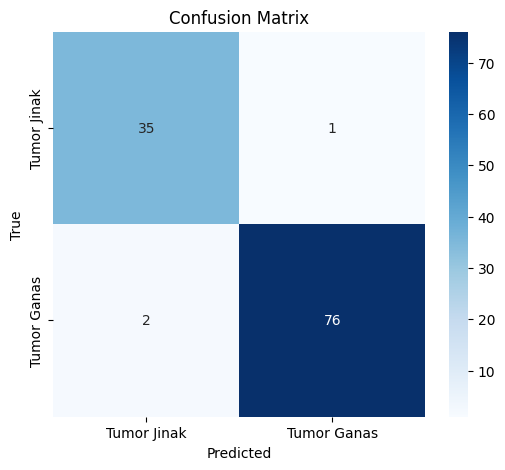

In [164]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Tumor Jinak', 'Tumor Ganas'], yticklabels=['Tumor Jinak', 'Tumor Ganas'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [165]:
report = classification_report(y_true, y_pred, target_names=['Benign', 'Malignant'])
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96        36
   Malignant       0.99      0.97      0.98        78

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# **2. Shallow Neural Network**

In [166]:
# Menetapkan seed untuk generator bilangan acak agar hasilnya konsisten/reproducible
np.random.seed(2)

# Menentukan jumlah neuron pada lapisan tersembunyi (hidden layer)
hidden_size = 6

# Membuat list kosong untuk menyimpan akurasi model SNN pada setiap epoch
snn_acc_list = []

# Membuat list kosong untuk mencatat epoch saat akurasi dicatat/logging dilakukan
snn_epochs_logged = []


In [167]:
# Inisialisasi bobot untuk lapisan pertama (input ke hidden), nilai acak antara -1 dan 1
w1 = 2 * np.random.rand(input_size, hidden_size) - 1

# Inisialisasi bias untuk lapisan pertama dengan nilai nol
b1 = np.zeros((1, hidden_size))

# Inisialisasi bobot untuk lapisan kedua (hidden ke output), nilai acak antara -1 dan 1
w2 = 2 * np.random.rand(hidden_size, output_size) - 1

# Inisialisasi bias untuk lapisan kedua dengan nilai nol
b2 = np.zeros((1, output_size))


In [168]:
# Parameter early stopping
tolerance = 0.01  # Ambang batas perubahan akurasi yang sangat kecil dianggap stagnan
prev_acc = 0  # Akurasi sebelumnya (untuk perbandingan)
max_no_improvement = 5  # Maksimum epoch tanpa peningkatan akurasi yang signifikan
epochs_without_improvement = 0  # Counter untuk epoch tanpa peningkatan

for epoch in range(100):
    # ====== Forward Propagation ======
    # Input ke hidden layer 1
    Z1 = np.dot(X_train, w1) + b1
    A1 = sigmoid(Z1)

    # Hidden layer 1 ke output layer
    Z2 = np.dot(A1, w2) + b2
    A2 = sigmoid(Z2)  # Output dari Shallow Neural Network

    # ====== Loss Function: Log Loss ======
    epsilon = 1e-15  # Untuk menghindari log(0)
    A2_clipped = np.clip(A2, epsilon, 1 - epsilon)  # Pastikan prediksi tidak 0 atau 1
    loss = -np.mean(y_train * np.log(A2_clipped) + (1 - y_train) * np.log(1 - A2_clipped))

    # ====== Backward Propagation ======
    error = y_train - A2

    # Gradien untuk output layer
    dA2 = error * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dA2)
    db2 = np.sum(dA2, axis=0, keepdims=True)

    # Gradien untuk hidden layer pertama
    dA1 = np.dot(dA2, w2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X_train.T, dA1)
    db1 = np.sum(dA1, axis=0, keepdims=True)

    # ====== Update Parameter (Gradient Descent) ======
    w2 += learning_rate * dW2
    b2 += learning_rate * db2
    w1 += learning_rate * dW1
    b1 += learning_rate * db1

    # ====== Logging setiap 100 epoch ======
    if epoch % 10 == 0:
        # Hitung akurasi berdasarkan prediksi dan label sebenarnya
        acc = np.mean(np.argmax(A2, axis=1) == np.argmax(y_train, axis=1))
        snn_acc_list.append(acc)
        snn_epochs_logged.append(epoch)
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc * 100:.2f}%")

        # Early stopping jika akurasi tidak meningkat secara signifikan
        if abs(acc - prev_acc) < tolerance:
            epochs_without_improvement += 1
        else:
            epochs_without_improvement = 0

        if epochs_without_improvement >= max_no_improvement:
            print(f"Training dihentikan di epoch {epoch} karena akurasi stagnan (Δ < {tolerance})")
            break

        prev_acc = acc


Epoch 0, Loss: 0.7649, Accuracy: 32.97%
Epoch 10, Loss: 0.1575, Accuracy: 96.70%
Epoch 20, Loss: 0.1113, Accuracy: 97.80%
Epoch 30, Loss: 0.0918, Accuracy: 98.46%
Epoch 40, Loss: 0.0811, Accuracy: 98.68%
Epoch 50, Loss: 0.0741, Accuracy: 98.90%
Epoch 60, Loss: 0.0692, Accuracy: 98.90%
Epoch 70, Loss: 0.0655, Accuracy: 98.90%
Training dihentikan di epoch 70 karena akurasi stagnan (Δ < 0.01)


In [169]:
# Forward propagation pada data uji
# Menghitung input untuk lapisan tersembunyi dari data uji
Z1_test = np.dot(X_test, w1) + b1

# Menerapkan fungsi aktivasi sigmoid pada lapisan tersembunyi (data uji)
A1_test = sigmoid(Z1_test)

# Menghitung input untuk lapisan output dari data uji
Z2_test = np.dot(A1_test, w2) + b2

# Menerapkan fungsi aktivasi sigmoid pada lapisan output (data uji)
A2_test = sigmoid(Z2_test)


In [170]:
# Mengambil indeks dengan nilai probabilitas tertinggi dari output sebagai prediksi kelas
y_pred = np.argmax(A2_test, axis=1)

# Mengambil label sebenarnya dari data uji (diasumsikan one-hot encoded)
y_true = np.argmax(y_test, axis=1)

# Menghitung akurasi prediksi dengan membandingkan hasil prediksi dan label sebenarnya
accuracy = np.mean(y_pred == y_true)

# Menampilkan akurasi akhir dari model Shallow Neural Network
print(f"Akurasi Shallow Neural Network: {accuracy * 100:.2f}%")


Akurasi Shallow Neural Network: 97.37%


# **3. MultiLayer Perception (MLP)**

In [171]:
# Menetapkan seed agar hasil acak tetap konsisten setiap kali program dijalankan
np.random.seed(2)

# Menentukan jumlah neuron pada hidden layer pertama
hidden1 = 6

# Menentukan jumlah neuron pada hidden layer kedua
hidden2 = 4

# List kosong untuk menyimpan akurasi model MLP pada setiap epoch
mlp_acc_list = []

# List kosong untuk mencatat epoch saat akurasi dicatat
mlp_epochs_logged = []


In [172]:
# Inisialisasi bobot untuk layer pertama (input → hidden1), dengan nilai acak antara -1 dan 1
W1 = 2 * np.random.rand(input_size, hidden1) - 1

# Inisialisasi bias untuk layer pertama dengan nilai nol
b1 = np.zeros((1, hidden1))

# Inisialisasi bobot untuk layer kedua (hidden1 → hidden2), dengan nilai acak antara -1 dan 1
W2 = 2 * np.random.rand(hidden1, hidden2) - 1

# Inisialisasi bias untuk layer kedua dengan nilai nol
b2 = np.zeros((1, hidden2))

# Inisialisasi bobot untuk layer ketiga (hidden2 → output), dengan nilai acak antara -1 dan 1
W3 = 2 * np.random.rand(hidden2, output_size) - 1

# Inisialisasi bias untuk layer ketiga dengan nilai nol
b3 = np.zeros((1, output_size))


In [173]:
# Parameter untuk Early Stopping
tolerance = 0.01  # Ambang batas perubahan akurasi yang sangat kecil dianggap stagnan
prev_acc = 0  # Akurasi sebelumnya (untuk perbandingan)
max_no_improvement = 5  # Maksimum epoch tanpa peningkatan akurasi yang signifikan
epochs_without_improvement = 0  # Counter untuk epoch tanpa peningkatan

for epoch in range(100):
    # ====== Forward Propagation ======
    # Input ke hidden layer 1
    Z1 = np.dot(X_train, W1) + b1
    A1 = sigmoid(Z1)

    # Hidden layer 1 ke hidden layer 2
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Hidden layer 2 ke output layer
    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)  # Output akhir dari MLP

    # ====== Loss Function: Log Loss ======
    epsilon = 1e-15  # Untuk menghindari log(0)
    A3_clipped = np.clip(A3, epsilon, 1 - epsilon)  # Pastikan prediksi tidak 0 atau 1
    loss = -np.mean(y_train * np.log(A3_clipped) + (1 - y_train) * np.log(1 - A3_clipped))

    # ====== Backward Propagation ======
    error = y_train - A3

    # Gradien untuk output layer
    dA3 = error * sigmoid_derivative(A3)
    dW3 = np.dot(A2.T, dA3)
    db3 = np.sum(dA3, axis=0, keepdims=True)

    # Gradien untuk hidden layer kedua
    dA2 = np.dot(dA3, W3.T) * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dA2)
    db2 = np.sum(dA2, axis=0, keepdims=True)

    # Gradien untuk hidden layer pertama
    dA1 = np.dot(dA2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X_train.T, dA1)
    db1 = np.sum(dA1, axis=0, keepdims=True)

    # ====== Update Parameter (Gradient Descent) ======
    W3 += learning_rate * dW3
    b3 += learning_rate * db3
    W2 += learning_rate * dW2
    b2 += learning_rate * db2
    W1 += learning_rate * dW1
    b1 += learning_rate * db1

    # ====== Logging setiap 10 epoch ======
    if epoch % 10 == 0:
        # Hitung akurasi berdasarkan prediksi dan label sebenarnya
        acc = np.mean(np.argmax(A3, axis=1) == np.argmax(y_train, axis=1))
        mlp_acc_list.append(acc)
        mlp_epochs_logged.append(epoch)
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc * 100:.2f}%")

        # Early stopping jika akurasi tidak meningkat secara signifikan
        if abs(acc - prev_acc) < tolerance:
            epochs_without_improvement += 1
        else:
            epochs_without_improvement = 0

        if epochs_without_improvement >= max_no_improvement:
            print(f"Training dihentikan di epoch {epoch} karena akurasi stagnan (Δ < {tolerance})")
            break

        prev_acc = acc


Epoch 0, Loss: 0.8286, Accuracy: 31.43%
Epoch 10, Loss: 0.3458, Accuracy: 94.07%
Epoch 20, Loss: 0.1512, Accuracy: 97.36%
Epoch 30, Loss: 0.1124, Accuracy: 98.02%
Epoch 40, Loss: 0.0935, Accuracy: 98.68%
Epoch 50, Loss: 0.0822, Accuracy: 98.90%
Epoch 60, Loss: 0.0749, Accuracy: 98.90%
Epoch 70, Loss: 0.0696, Accuracy: 99.12%
Training dihentikan di epoch 70 karena akurasi stagnan (Δ < 0.01)


In [174]:
# ====== Forward Propagation pada Data Uji ======

# Input ke hidden layer pertama
Z1_test = np.dot(X_test, W1) + b1
A1_test = sigmoid(Z1_test)

# Hidden layer pertama ke hidden layer kedua
Z2_test = np.dot(A1_test, W2) + b2
A2_test = sigmoid(Z2_test)

# Hidden layer kedua ke output layer
Z3_test = np.dot(A2_test, W3) + b3
A3_test = sigmoid(Z3_test)  # Output akhir dari data uji


In [175]:
# Mengambil indeks dengan nilai tertinggi dari output sebagai prediksi kelas
y_pred = np.argmax(A3_test, axis=1)

# Mengambil label sebenarnya dari data uji (diasumsikan one-hot encoded)
y_true = np.argmax(y_test, axis=1)

# Menghitung akurasi dengan membandingkan prediksi dan label sebenarnya
accuracy = np.mean(y_pred == y_true)

# Menampilkan akurasi akhir dari model MLP
print(f"Akurasi MLP: {accuracy * 100:.2f}%")


Akurasi MLP: 96.49%


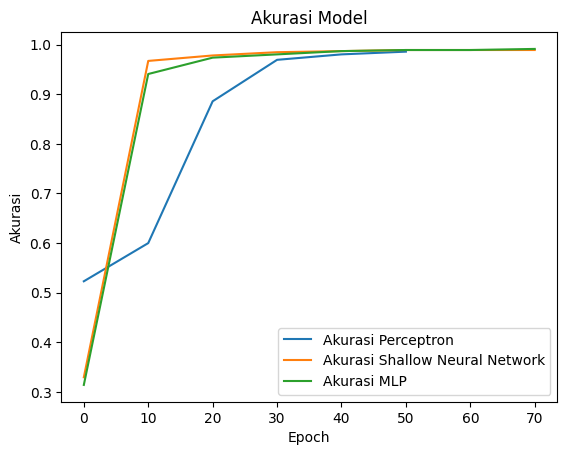

In [176]:
plt.plot(perceptron_epochs_logged, perceptron_acc, label='Akurasi Perceptron')
plt.plot(snn_epochs_logged, snn_acc_list, label='Akurasi Shallow Neural Network')
plt.plot(mlp_epochs_logged, mlp_acc_list, label='Akurasi MLP')

plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()